In [3]:
from typing import TypedDict, List
from langgraph.graph import StateGraph
import math

In [4]:
class AgentState(TypedDict):
    name : str
    values : List[int]
    operation : str
    result : int

In [5]:
def calculator(state : AgentState) -> AgentState:
    if state["operation"] == "+":
        state['result'] = f"hi {state['name']} your answer is {sum(state['values'])}"
    elif state['operation'] == "*":
        state['result'] = f"hi {state['name']} your answer is {math.prod(state['values'])}"
    
    return state

In [6]:
graph = StateGraph(AgentState)

graph.add_node("calculator", calculator)
graph.set_entry_point("calculator")
graph.set_finish_point("calculator")
app = graph.compile()

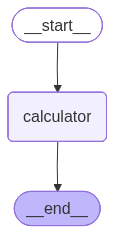

In [7]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [9]:
result = app.invoke({"name" : "sragh", "values" : [1,2,3,4], "operation" : "+"})
print(result['result'])



hi sragh your answer is 10
